<a href="https://colab.research.google.com/github/delibae/health_care_pr/blob/main/project_3/%EB%B0%B0%ED%95%9C%EC%A7%84/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install -U kaleido

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,142 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

# Import

In [ ]:
# Charts
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import Image, display

글꼴 / 이미지 파일화 다운로드(런타임 다시시작 필요)

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

# Load Data

In [ ]:

covid_confirmed = '/content/drive/MyDrive/data/covid/서울시 코로나19 확진자 현황.csv'
location = '/content/drive/MyDrive/data/covid/서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv'

confirmed = pd.read_csv(covid_confirmed)
location = pd.read_csv(location)

In [ ]:
confirmed.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,5748,10.21.,25530,NaN,NaN,양천구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
1,5747,10.21.,25528,NaN,NaN,강동구,NaN,강남서초 지인모임,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
2,5746,10.21.,25525,NaN,NaN,강남구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
3,5745,10.21.,25517,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
4,5744,10.21.,25504,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y


## 결측치 처리1

In [ ]:
print(confirmed.확진일.value_counts())
print("------------------------------")
print(confirmed.국적.value_counts())
print("------------------------------")
print(confirmed.환자정보.value_counts())
print("------------------------------")
print(confirmed.지역.value_counts())
print("------------------------------")
print(confirmed.여행력.value_counts())
print("------------------------------")
print(confirmed.접촉력.value_counts())
print("------------------------------")
print(confirmed.조치사항.value_counts())
print("------------------------------")
print(confirmed.상태.value_counts())
print("------------------------------")
print(confirmed.이동경로.value_counts())




8.29.    167
8.27.    160
8.26.    157
8.18.    151
8.15.    146
        ... 
4.20.      1
4.19.      1
4.18.      1
4.15.      1
1.24.      1
Name: 확진일, Length: 244, dtype: int64
------------------------------
Series([], Name: 국적, dtype: int64)
------------------------------
Series([], Name: 환자정보, dtype: int64)
------------------------------
관악구     452
송파구     361
성북구     344
타시도     331
노원구     323
강남구     296
강서구     295
은평구     259
동작구     254
도봉구     223
서초구     210
중랑구     201
영등포구    200
강동구     199
구로구     193
양천구     186
마포구     180
동대문구    172
강북구     156
용산구     140
광진구     136
서대문구    135
성동구     130
기타      116
금천구      96
종로구      94
중구       64
종랑구       1
한국        1
Name: 지역, dtype: int64
------------------------------
미국                      153
영국                       50
필리핀                      25
인도                       13
프랑스                      13
                       ... 
프랑스 스페인 독일 이탈리아 네덜란드      1
호주 인도네시아                  1
포르투칼                      1
미

['국적', '환자정보' ,'조치사항', '이동경로']  은 모두 결측치이므로 drop column  <br/> 
등록일 수정일 노출여부 또한 필요 없는 데이터 이므로 drop

In [ ]:
confirmed = confirmed.drop(['국적', '환자정보' ,'조치사항', '이동경로','등록일','수정일','노출여부'], axis=1)

In [ ]:
confirmed.head()

,연번,확진일,환자번호,지역,여행력,접촉력,상태
0,5748,10.21.,25530,양천구,NaN,감염경로 조사중,NaN
1,5747,10.21.,25528,강동구,NaN,강남서초 지인모임,NaN
2,5746,10.21.,25525,강남구,NaN,기타 확진자 접촉,NaN
3,5745,10.21.,25517,관악구,NaN,감염경로 조사중,NaN
4,5744,10.21.,25504,관악구,NaN,기타 확진자 접촉,NaN


In [ ]:
location

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155
5,6,11530,구로구,Guro-gu,5,37.495486,126.858121
6,7,11110,종로구,Jongno-gu,6,37.599100,126.986149
7,8,11305,강북구,Gangbuk-gu,7,37.646995,127.014716
8,9,11260,중랑구,Jungnang-gu,8,37.595379,127.093967
9,10,11680,강남구,Gangnam-gu,9,37.495985,127.066409


# 주제

**코로나 데이터 분석**


# 활용 분야

코로나 데이터 분석을 통한 확진자수와 관계있는 인자 추출 및 이를 통한 시계열 모델 데이터셋 전처리 기반 마련

# 수행 목표

* 목적: 시계열 데이터 학습 채널 구성을 위한 특성 추출
* 근거: 시계열 데이터 분석의 경우 여러 채널(특징)을 주어서 값을 분석하게 하는 것이 일반적임. 이러한 경우 채널과 분석값의 연관성 및 상관관계가 매우 중요
* 목표: 확진자수 시계열 데이터 분석을 위한 관련 특성 추출 및 근거를 위한 시각화

# -----------수행 내용 및 결과 -----------

# Data Analysis(시각화)

## bar graph 시각화(column value count to bar graph)


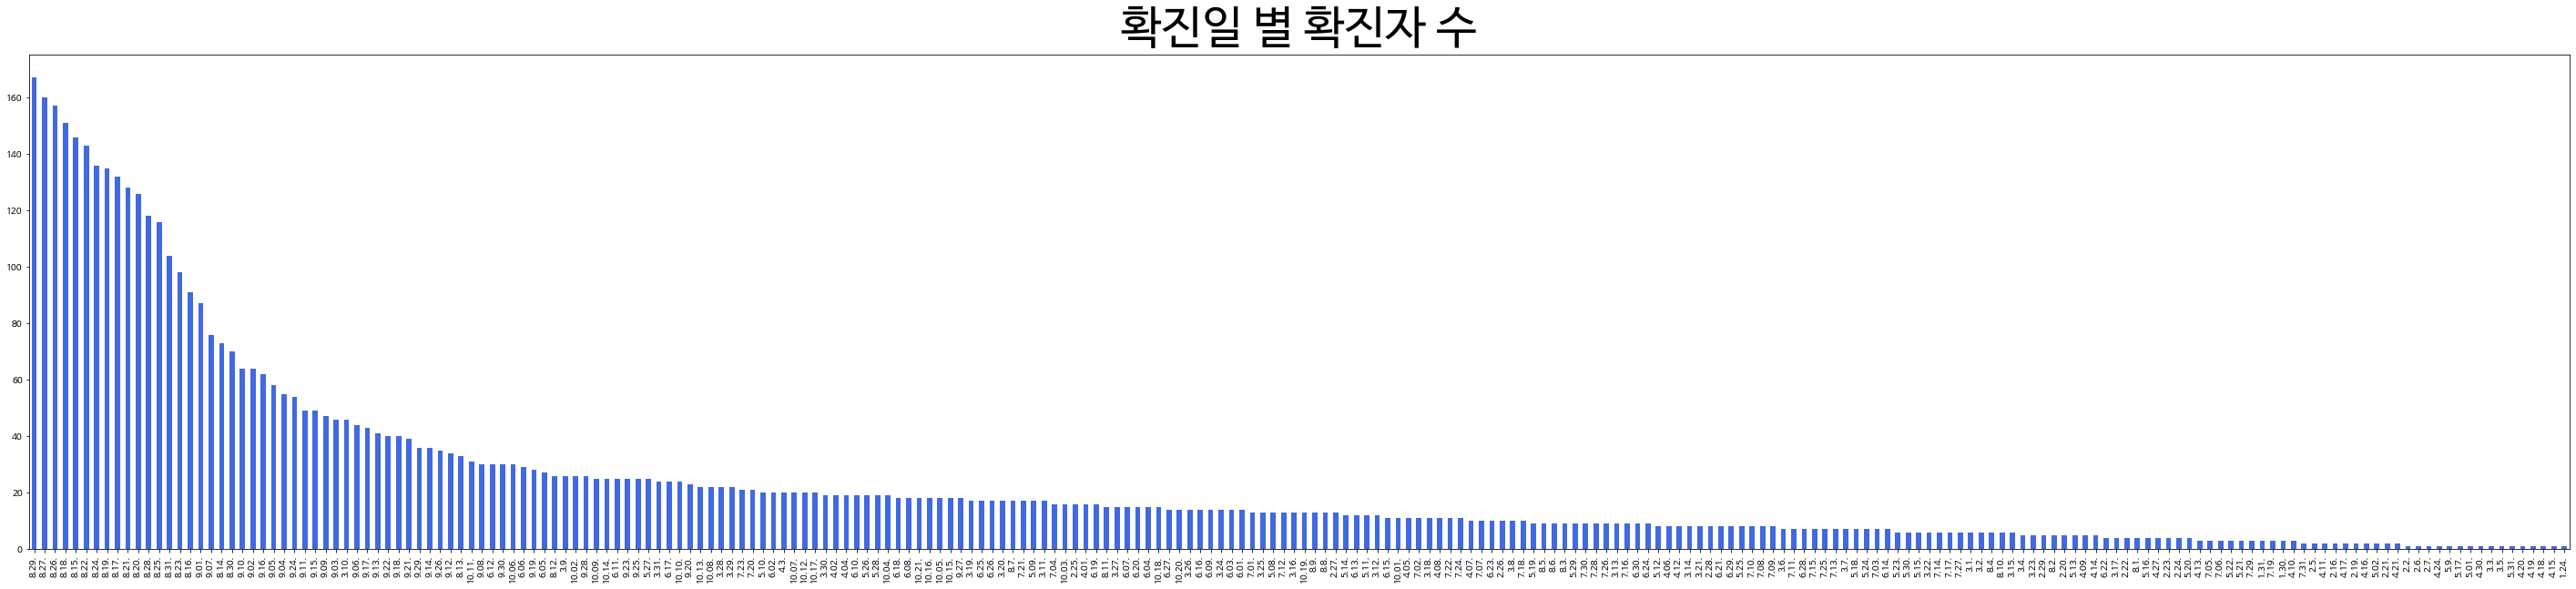

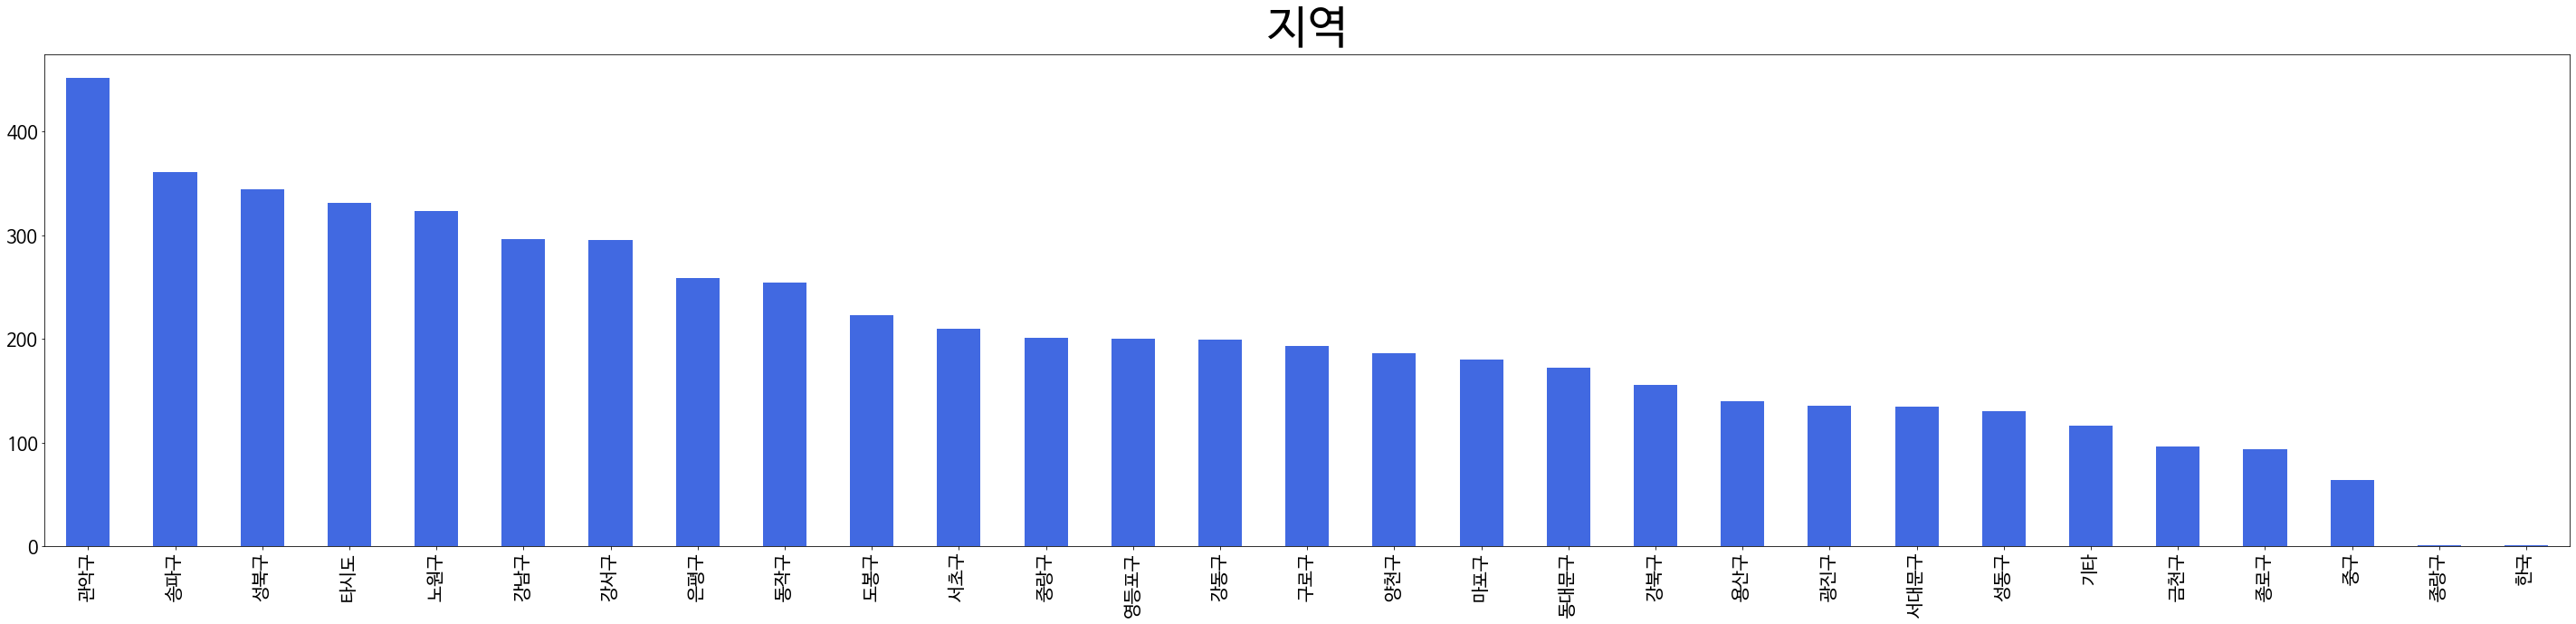

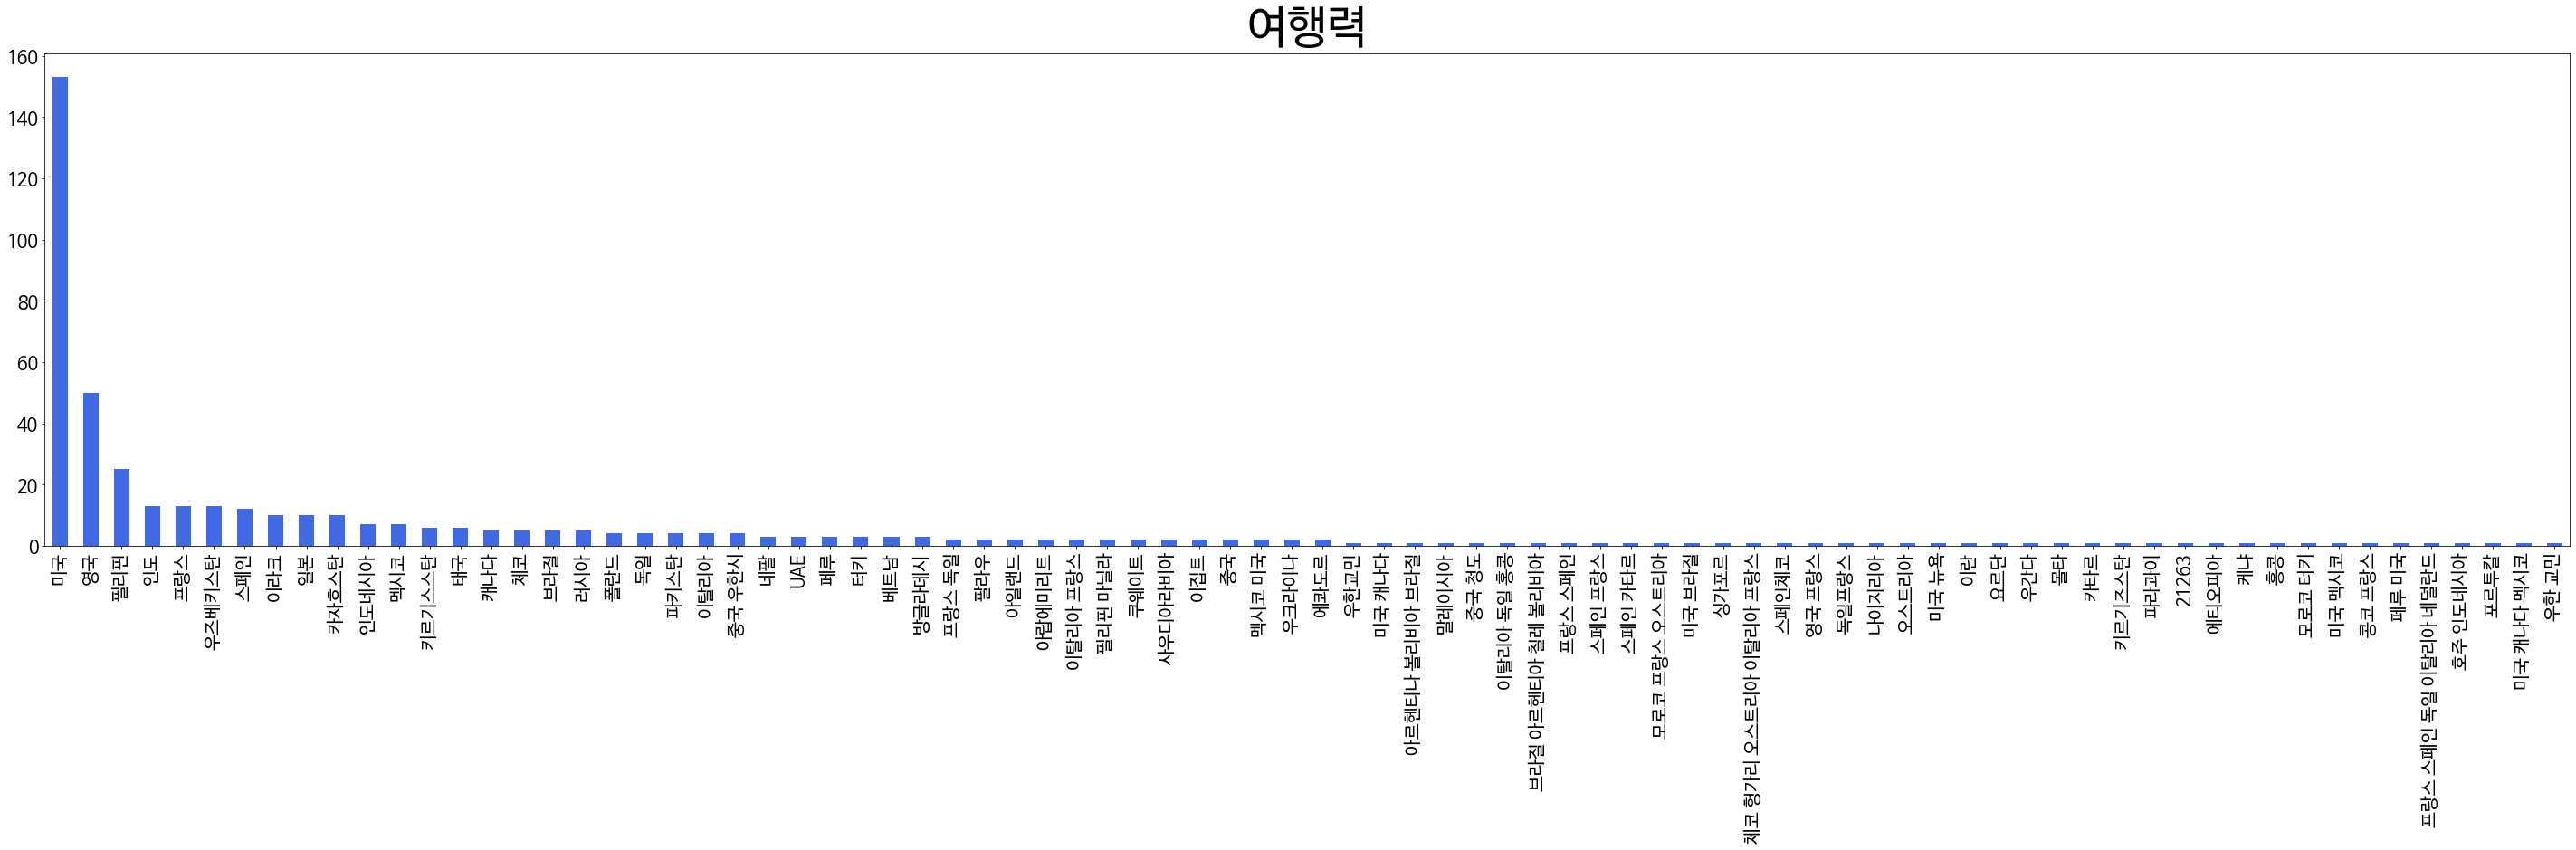

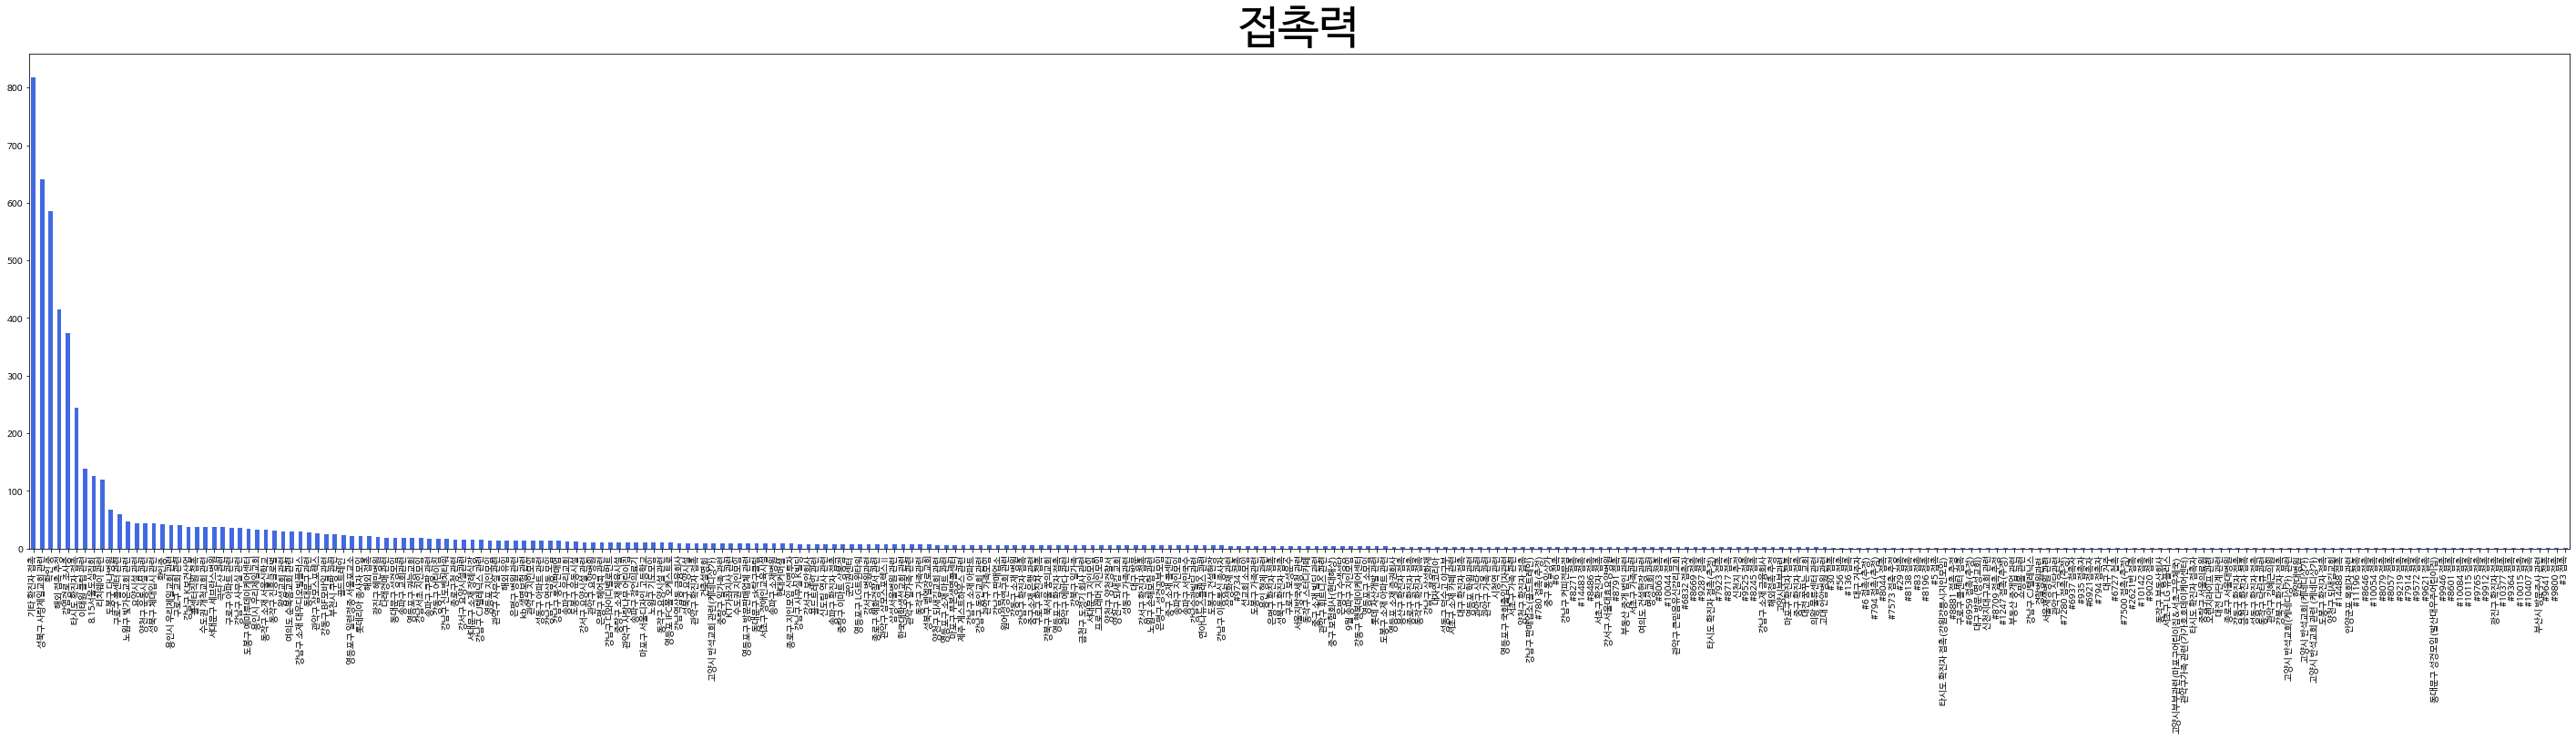

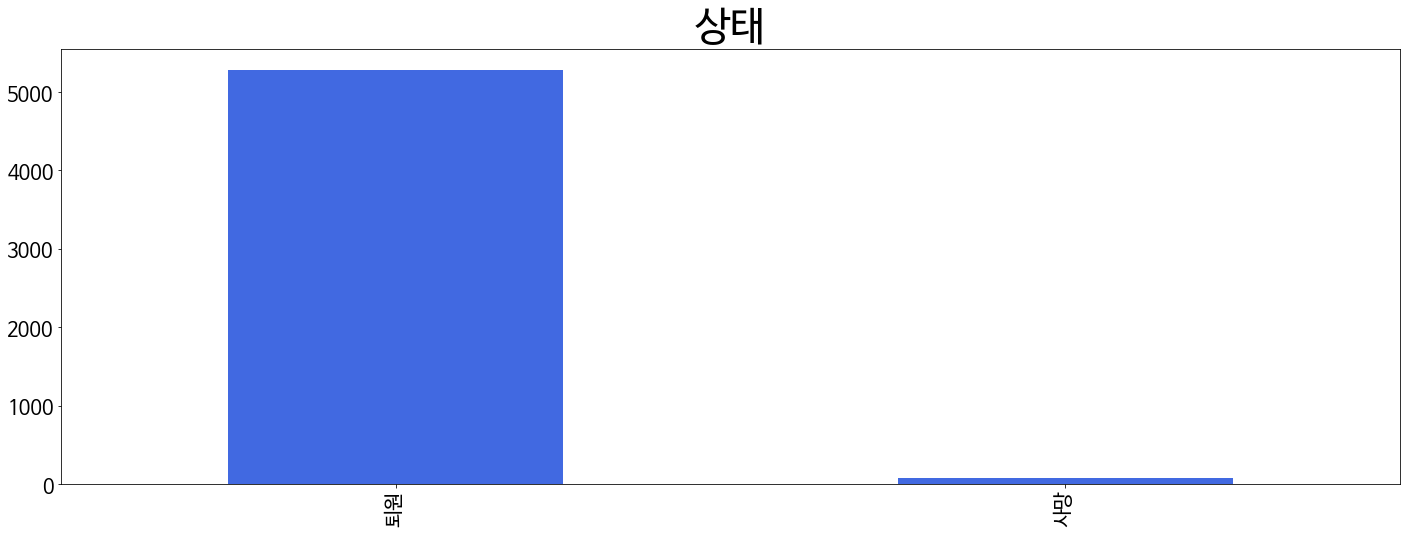

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

figsize = (50,10)
title_font_size = 50
fontsize1 = 10
fontsize2 = 20
color = 'royalblue'
confirmed.확진일.value_counts().plot(kind='bar', figsize = figsize, color = color, fontsize= fontsize1)
plt.title('확진일 별 확진자 수', fontsize=title_font_size)
plt.show()

confirmed.지역.value_counts().plot(kind='bar', figsize = figsize, color = color, fontsize = fontsize2)
plt.title('지역', fontsize=title_font_size)
plt.show()




confirmed.여행력.value_counts().plot(kind='bar', figsize= figsize, color = color, fontsize = fontsize2)
plt.title('여행력', fontsize=title_font_size)
plt.show()




confirmed.접촉력.value_counts().plot(kind='bar', figsize = figsize, color = color,fontsize = fontsize1)
plt.title('접촉력', fontsize=title_font_size)
plt.show()

confirmed.상태.value_counts().plot(kind='bar', figsize = (24,8), color = color,fontsize = fontsize2)
plt.title('상태', fontsize=40)

plt.show()

## 지역별 확진자 지도(choropleth)

In [ ]:
import folium
import json

### 결측치 처리2

지도에 라벨이 한국이라고 되어 있는 부분의 좌표를 (0,0) 으로 리턴

In [ ]:
geo_path = '/content/drive/MyDrive/data/covid/seoul_municipalities_geo_simple.json'
geo_json = json.load(open(geo_path, encoding='utf-8'))

def add1(valid):

    loc = location[location['시군구명_한글'] == valid]['경도'].values.tolist()
    if len(loc) == 0:
      return 0
    return loc[0]
    
def add2(valid):
    loc = location[location['시군구명_한글'] == valid]['위도'].values.tolist()
    if len(loc) == 0:
      return 0
    return loc[0]

confirmed['경도'] = confirmed.apply(lambda row : add1(row['지역']), axis = 1)

confirmed['위도'] = confirmed.apply(lambda row : add2(row['지역']), axis = 1)

In [ ]:
df = pd.DataFrame(confirmed.지역.value_counts(dropna=False))


df = df.reset_index()
df.columns = ['장소','확진자수']
df

,장소,확진자수
0,관악구,452
1,송파구,361
2,성북구,344
3,타시도,331
4,노원구,323
5,강남구,296
6,강서구,295
7,은평구,259
8,동작구,254
9,도봉구,223


### choropleth map plot

In [ ]:
# map = folium.Map(location=[37.5545660680291,127.04672806823502], 
#                  zoom_start=10,
#                  zoom_control=False,
#                scrollWheelZoom=False,
#                dragging=False)

# map.choropleth(geo_data = geo_json,
#                data = df,
#                fill_color = 'BuPu',
#                columns = ['장소','확진자수'],
#                key_on = 'feature.properties.name',
#                fill_opacity=0.7,
#                line_opacity=0.2,

#                highlight=True,
# )

            
# map

In [ ]:
import plotly.express as px
import pandas as pd 
import os 



In [ ]:


fig = px.choropleth(df, geojson=geo_json, locations='장소', color='확진자수',
                           color_continuous_scale="Blues",
                          featureidkey='properties.name'
                          
                          )

fig.update_geos(fitbounds="locations", visible=False)

fig.write_image("/content/drive/MyDrive/data/covid/image/fig1.png")

fig.show()

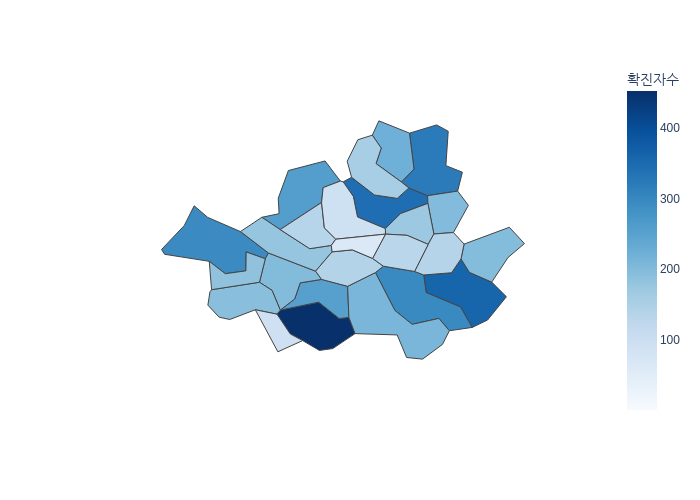

In [ ]:
Image(filename='/content/drive/MyDrive/data/covid/image/fig1.png') 

## 월별 확진자 수

In [ ]:
# month 열 생성


confirmed['month'] = confirmed.apply(lambda row : row['확진일'].split('.')[0], axis = 1)

In [ ]:
confirmed['month']

0       10
1       10
2       10
3       10
4       10
        ..
5743     1
5744     1
5745     1
5746     1
5747     1
Name: month, Length: 5748, dtype: object

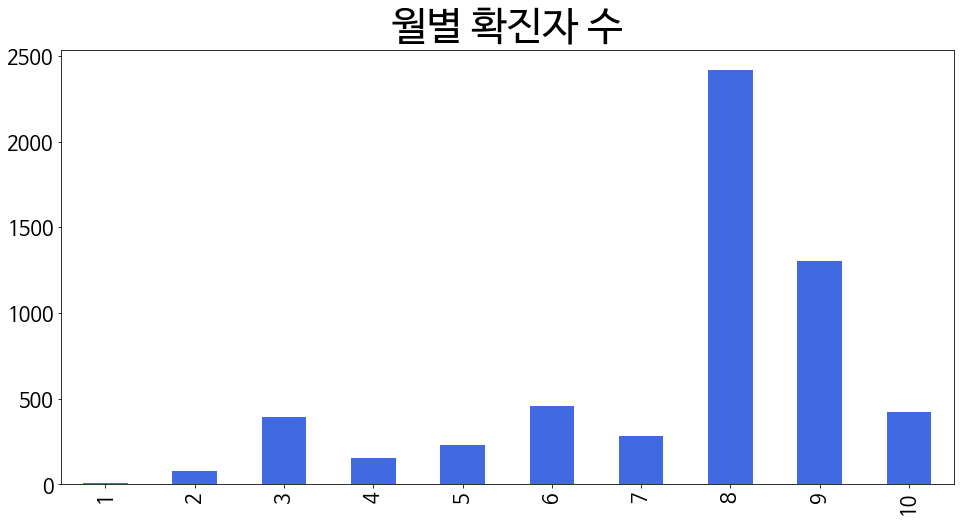

In [ ]:
figsize = (16,8)
title_font_size = 40
month_df = confirmed.month.value_counts()
month_index = confirmed.month.value_counts().index.tolist()
month_index = map(int,month_index)
month_df.index = month_index
month_df  =month_df.sort_index()
month_df.plot(kind='bar', figsize = figsize, color = 'royalblue', fontsize = 20)
plt.title('월별 확진자 수', fontsize=title_font_size)
plt.show()

## 여행객과 전체 확진자수

### 가설

가설: 확진자수에서 여행자수는 큰 비중을 차지하지 않을 것이다.

### plot graph

In [ ]:
# 여행여부 열 추가
import math
def is_null(value):
  if type(value) == str:
    return True
  else:
    return False
confirmed['여행여부'] = confirmed.apply(lambda row : is_null(row['여행력']), axis = 1)

In [ ]:
confirmed['여행여부']

0       False
1       False
2       False
3       False
4       False
        ...  
5743    False
5744     True
5745    False
5746     True
5747     True
Name: 여행여부, Length: 5748, dtype: bool

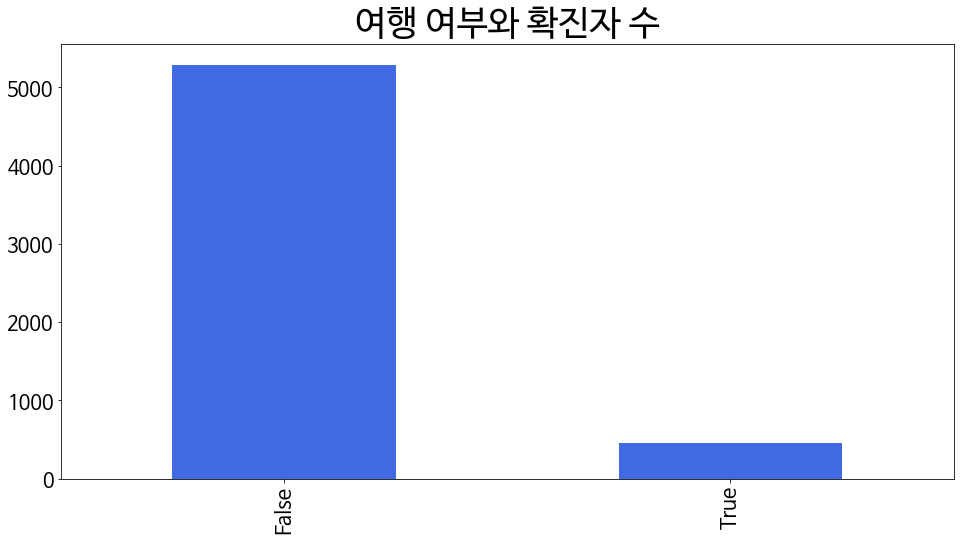

In [ ]:
figsize = (16,8)
title_font_size = 35
confirmed.여행여부.value_counts().plot(kind='bar', figsize = figsize, color = 'royalblue', fontsize = 20)
plt.title('여행 여부와 확진자 수', fontsize=title_font_size)
plt.show()

### 분석

전체 여행객 수와 확진자 비율 관계가 신뢰성이 있을 듯

In [ ]:
confirmed.head()

,연번,확진일,환자번호,지역,여행력,접촉력,상태,경도,위도,month,여행여부
0,5748,10.21.,25530,양천구,NaN,감염경로 조사중,NaN,126.856153,37.527062,10,False
1,5747,10.21.,25528,강동구,NaN,강남서초 지인모임,NaN,127.146482,37.549208,10,False
2,5746,10.21.,25525,강남구,NaN,기타 확진자 접촉,NaN,127.066409,37.495985,10,False
3,5745,10.21.,25517,관악구,NaN,감염경로 조사중,NaN,126.943807,37.465399,10,False
4,5744,10.21.,25504,관악구,NaN,기타 확진자 접촉,NaN,126.943807,37.465399,10,False


## 지역과 월별 확진자수의 상관관계(seaborn heatmap)

### 가설

가설: 지역과 월별 확진자수를 분석하면 월별로 집중된 지역이 있을 것이다.

### plot heatmap

In [ ]:
class1 = confirmed['month'].unique().tolist()
class2 = confirmed['지역'].unique().tolist()

matrix = [[0]*len(class2) for _ in range(len(class1))]


for i in range(len(confirmed.index)):
  get = confirmed.iloc[i,:]
  loc = class2.index(get['지역'])
  month = class1.index(get['month'])
  matrix[month][loc] += 1


In [ ]:
len(matrix)

10

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



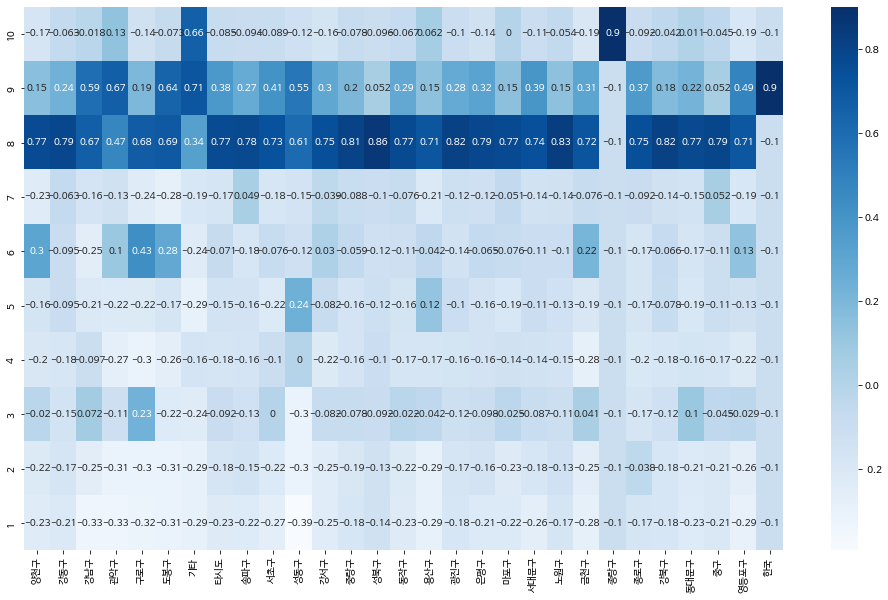

In [ ]:
import seaborn as sn

# 열별(월별) 정규화
def mean_norm(df_input):
    return df_input.apply(lambda x: (x/ x.max()), axis=0)

matrix2 = pd.DataFrame(matrix)

matrix2.index = [i for i in class1]
matrix2.columns = [i for i in class2]

matrix2 = matrix2.apply(lambda x: (x - x.mean())/ x.max(), axis=0)
plt.figure(figsize = (17,10))
plt.rc('font', family='NanumBarunGothic') 
sns.heatmap(matrix2, annot=True, cmap = 'Blues')

### 분석

분석: 
월별로 집중된 지역은 존재하나 고르게 퍼진 지역일수록 확진자수가 높은 것으로 보인다.

## 월별 지역별 확진자 지도(choropleth)

### 가설

가설: 지역 집중도에 따른 확진자수의 특성이 있을 것이다.

### plot choropleth

In [ ]:
class1 = confirmed['month'].unique().tolist()
class2 = confirmed['지역'].unique().tolist()

matrix_image = [[0]*len(class1) for _ in range(len(class2))]


for i in range(len(confirmed.index)):
  get = confirmed.iloc[i,:]
  loc = class2.index(get['지역'])
  month = class1.index(get['month'])
  matrix_image[loc][month] += 1

image_list = []
for i in range(1,11):
  month = str(i)

  matrix3 = pd.DataFrame(matrix_image)
  matrix3.index = [i for i in class2]
  matrix3.columns = [i for i in class1]
  df_in = pd.DataFrame(matrix3[month])
  df_in = df_in.reset_index()
  df_in.columns = ['장소','확진자수']
  df_in
  fig = px.choropleth(df_in, geojson=geo_json, locations='장소', color='확진자수',
                            color_continuous_scale="Blues",
                            featureidkey='properties.name',
                            title = month + '월'
                            
                            )


  fig.update_geos(fitbounds="locations", visible=False)

  fig.write_image("/content/drive/MyDrive/data/covid/image/" + "mon" + month + ".png")
  image_list.append("/content/drive/MyDrive/data/covid/image/" + "mon" + month + ".png")

  fig.show()

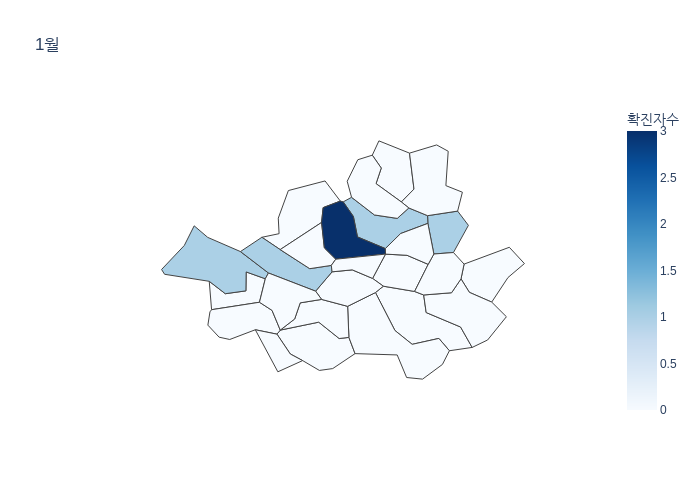

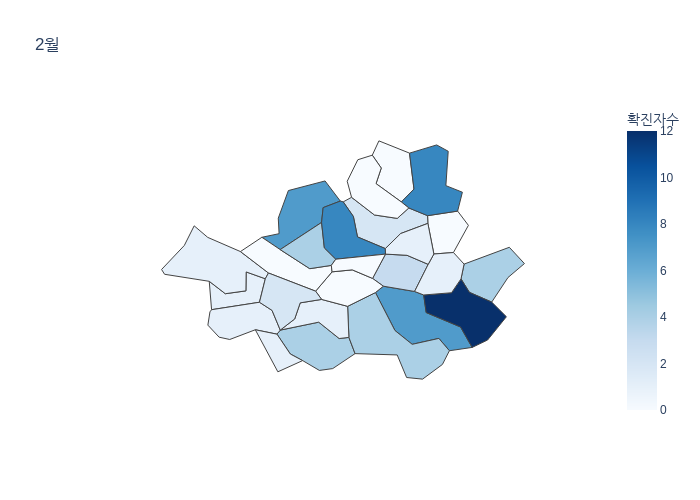

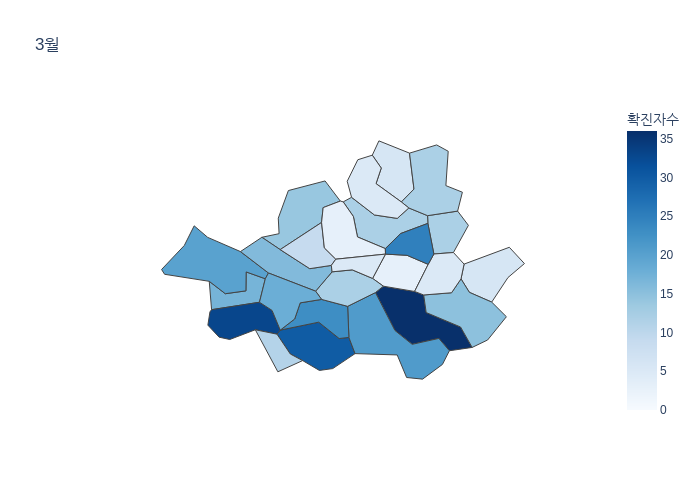

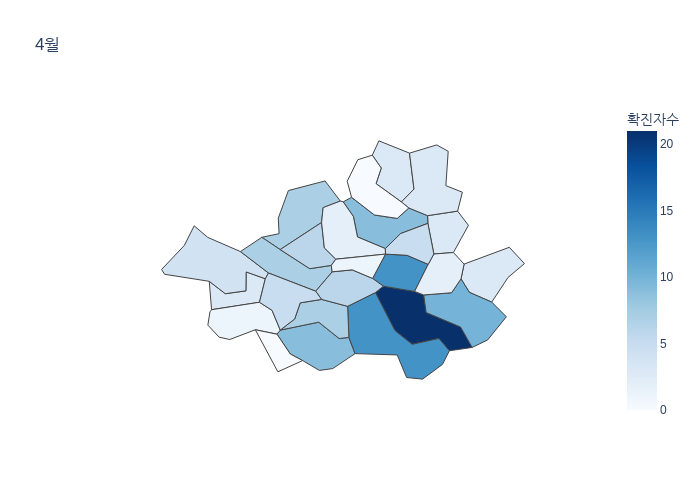

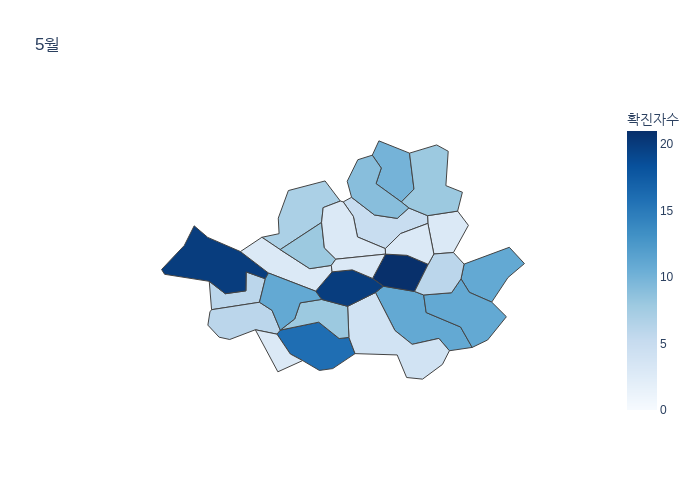

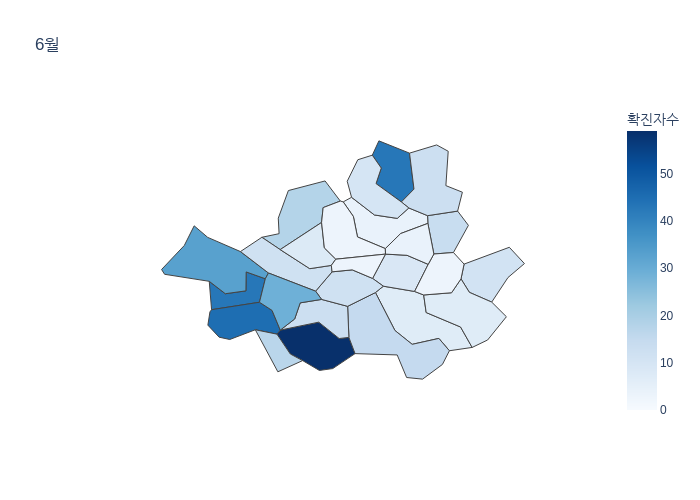

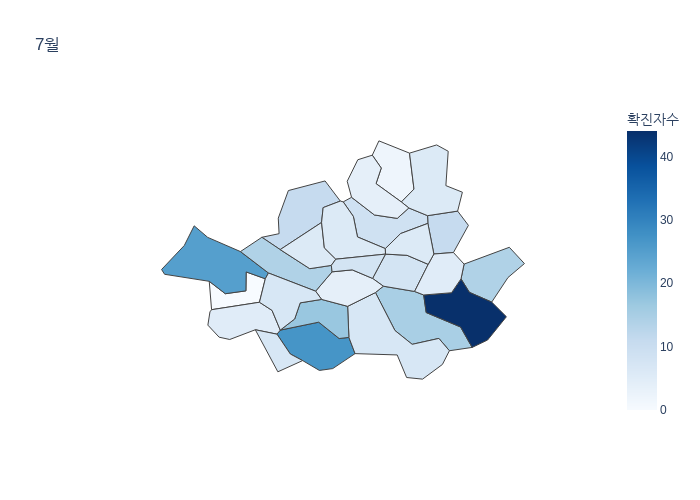

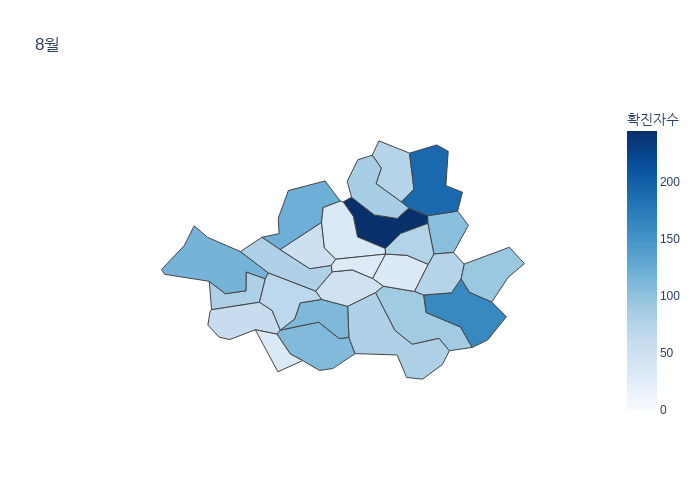

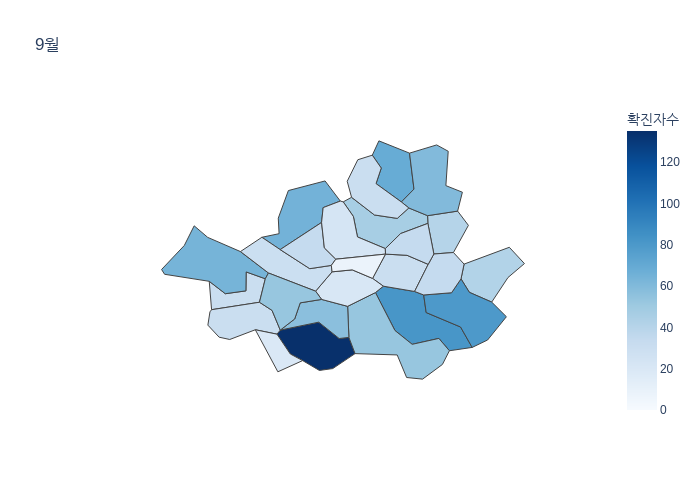

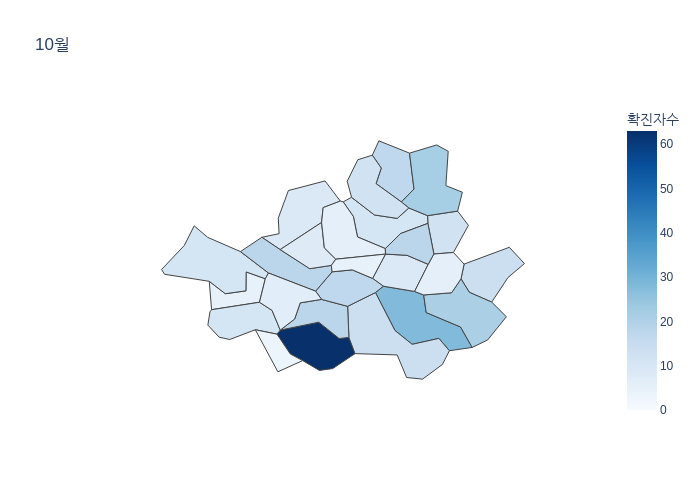

In [ ]:
for imageName in image_list:
    display(Image(filename=imageName))

### 분석

분석: 대략적으로 보았을때 넓게 분포 확진 지역이 한쪽에 집중 되지 않고 넓게 퍼져있을 수록 확진자 수 자체가 높은 경향이 있음  <br/>
(원인과 결과의 우선관계를 파악하기는 어려움)

## 지역별 확진자수의 표준편차와 확진자수 관계

### 가설

가설: 넓은 지역에 고르게 확진자가 있을수록 전체 확진자수가 많아질 것이다.

x축: 표준편차*100/평균(상대 표준편차 RDS)  <br/>
y축: 확진자수

표준편차가 높을수록 확진자수가 낮아지므로 반비례하는 산점도가 표현될 것

### plot graph

In [ ]:
class1 = confirmed['month'].unique().tolist()
class2 = confirmed['지역'].unique().tolist()

matrix_std = [[0]*len(class2) for _ in range(len(class1))]


for i in range(len(confirmed.index)):
  get = confirmed.iloc[i,:]
  loc = class2.index(get['지역'])
  month = class1.index(get['month'])
  matrix_std[month][loc] += 1


In [ ]:
import seaborn as sn

# 열별(월별) 정규화
# def mean_norm(df_input):
#     return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

matrix3 = pd.DataFrame(matrix_std)

std_up = pd.DataFrame(matrix3.apply(lambda x: x.std()*100/x.mean(), axis = 1),columns = ['std'])

matrix3.index = [i for i in class1]
matrix3.columns = [i for i in class2]

std_up['sum'] = matrix3.apply(lambda x: x.sum(), axis = 1).tolist()
std_up.sort_values(by=['std'])
std_up

,std,sum
0,84.898916,425
1,63.367918,1304
2,64.909986,2416
3,95.511570,281
4,96.448636,460
5,74.377538,228
6,88.236794,156
7,72.089976,391
8,118.914829,80
9,263.304854,7


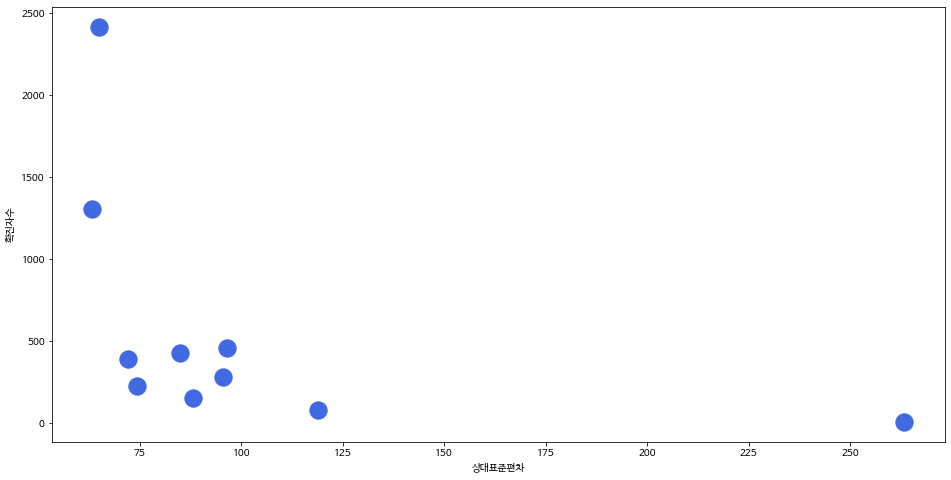

In [ ]:
x_list = std_up['std'].to_numpy()
# print(x_list)
y_list = std_up['sum'].to_numpy()
# print(y_list)
plt.figure(figsize = (16,8))
plt.scatter(x_list, y_list, s=300, color = 'royalblue')
plt.xlabel('상대표준편차')
plt.ylabel('확진자수')
plt.rc('font', size=15)

plt.show()

### 분석

결과적으로 표준편차가 낮을수록 확진자수가 높아지는 반비례 그래프가 그려짐  <br/>
지역별로 고르게 확진자가 분포할수록 확진자수가 커짐을 확인함

### 비례 그래프로의 변환

In [ ]:
matrix3 = pd.DataFrame(matrix_std)
# 기존 x값을 1/x로 변경
std_up2 = pd.DataFrame(matrix3.apply(lambda x: 1/(x.std()*100/x.mean()), axis = 1),columns = ['std'])

matrix3.index = [i for i in class1]
matrix3.columns = [i for i in class2]

std_up2['sum'] = matrix3.apply(lambda x: x.sum(), axis = 1).tolist()

std_up2

,std,sum
0,0.011779,425
1,0.015781,1304
2,0.015406,2416
3,0.010470,281
4,0.010368,460
5,0.013445,228
6,0.011333,156
7,0.013872,391
8,0.008409,80
9,0.003798,7


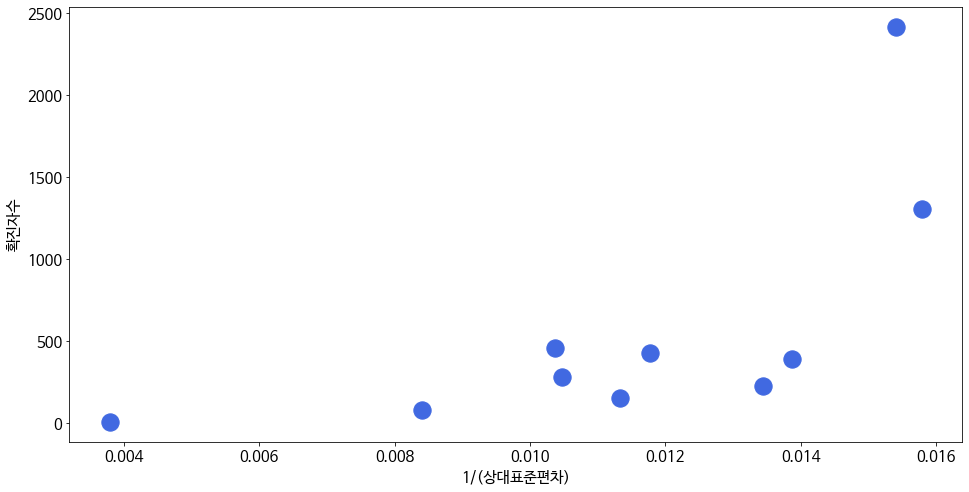

In [ ]:
x_list = std_up2['std'].to_numpy()
# print(x_list)
y_list = std_up2['sum'].to_numpy()
# print(y_list)
plt.figure(figsize = (16,8))
plt.scatter(x_list, y_list, s=300, color = 'royalblue')
plt.xlabel('1/(상대표준편차)')
plt.ylabel('확진자수')
plt.rc('font', size=15)

plt.show()

### 분석

제곱에 비례(원래값은 제곱에 반비례)하는 경향이 있는 듯 하다

### 월별 확진자수 , (1/상대표준편차) 그래프

In [ ]:

matrix3 = pd.DataFrame(matrix_std)
# 기존 x값을 1/x로 변경
std_up3 = pd.DataFrame(matrix3.apply(lambda x: 1/(x.std()*100/x.mean()), axis = 1),columns = ['std'])

matrix3.index = [i for i in class1]
matrix3.columns = [i for i in class2]

std_up3['sum'] = matrix3.apply(lambda x: x.sum(), axis = 1).tolist()

std_up3

,std,sum
0,0.011779,425
1,0.015781,1304
2,0.015406,2416
3,0.010470,281
4,0.010368,460
5,0.013445,228
6,0.011333,156
7,0.013872,391
8,0.008409,80
9,0.003798,7


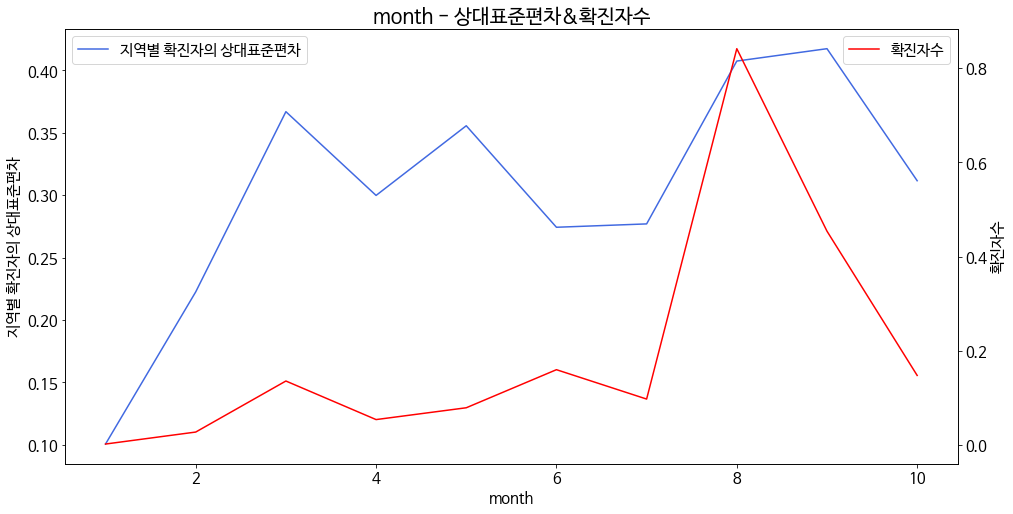

In [ ]:
import numpy as np
x_list = np.array([10,9,8,7,6,5,4,3,2,1])

y_list1 = std_up3['std'].to_numpy()

y_list1 = y_list1 / np.linalg.norm(y_list1)
# print(x_list)
y_list2 = std_up3['sum'].to_numpy()
y_list2 = y_list2 / np.linalg.norm(y_list2)
# print(y_list2)
# print(y_list)


fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot()
plt.rc('font', size=15)

ax1.plot(x_list,y_list1, color='royalblue', label='지역별 확진자의 상대표준편차')
ax1.set_ylabel('지역별 확진자의 상대표준편차')
ax1.set_xlabel('month')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(x_list, y_list2, color='red', label='확진자수')
ax2.set_ylabel('확진자수')
ax2.legend(loc='upper right')

plt.title('month - 상대표준편차&확진자수', fontsize = 20)
plt.show()

### 분석

나름 명확한 비례 관계를 보이고 있다. <br/>
어느 하나가 선행지표가 되는 그런 모습은 보이지는 않는다.

## 월별 여행자수와 확진자수의 상관관계

### 가설

기준 수치
* y축: (월별 확진자수)/(월별 여행자수) => 여행자 확진자 비례상수
* x축: (월별 여행자수)
* 가설: 월별 여행자수가 커질수록 여행자 확진자 비례상수가 커질 것이다

### plot graph

In [ ]:
mt = confirmed[['month','여행여부']]

# month = '1'

p_num = pd.DataFrame(mt['month'].value_counts()).sort_index()
p_index = map(int,p_num.index.tolist())
p_num.index = p_index

p_num = p_num.sort_index()
p_num.columns = ['확진자수']

p_num['여행자수'] = 0


def find_travel(value):
  val_mon = int(value['month']) -1
  val_tf = value['여행여부']
  if val_tf == False:
    val_tf = 0
  else:
    val_tf = 1

  p_num[val_mon:val_mon+1]['여행자수'] += val_tf


mt.apply(lambda row : find_travel(row), axis = 1)
p_num.sort_values(by='여행자수')
p_num['y'] = p_num.apply(lambda row: int(row['확진자수']/row['여행자수']), axis = 1)
p_num

,확진자수,여행자수,y
1,7,3,2
2,80,11,7
3,391,132,2
4,156,113,1
5,228,24,9
6,460,24,19
7,281,39,7
8,2416,51,47
9,1304,23,56
10,425,39,10


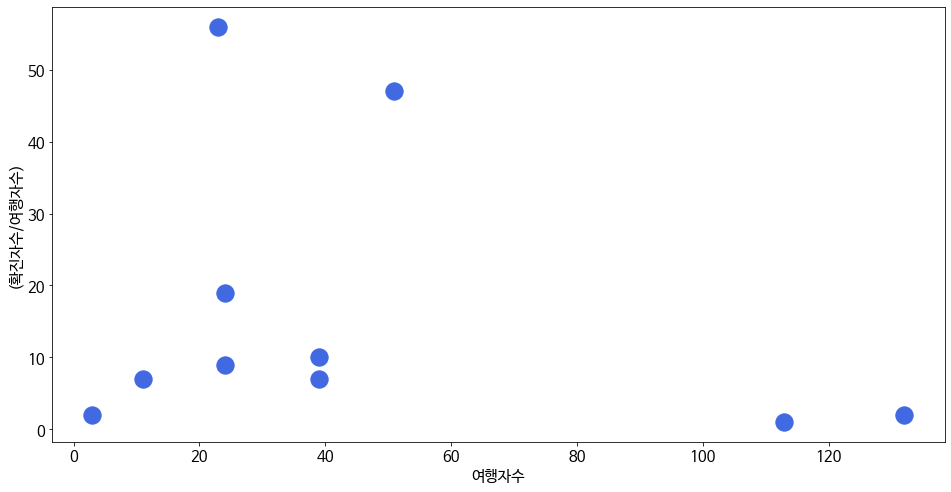

In [ ]:
x_list = p_num['여행자수'].to_numpy()
# print(x_list)
y_list = p_num['y'].to_numpy()
# print(y_list)
plt.figure(figsize = (16,8))
plt.scatter(x_list, y_list, s=300, color = 'royalblue')
plt.xlabel('여행자수')
plt.ylabel('(확진자수/여행자수)')

plt.rc('font', size=15)
plt.show()

### 분석

결론: 상관관계가 있다면 산점도 그래프가 비례 관계를 보였겠지만 그렇지 않았다. <br/>
그러므로 (확진자수/여행자수) 와 여행자수의 상관관계는 없다고 볼 수 있다. 

# 데이터 분석 총평

* 분석 1
  1. 확진일: 월별로 분석한 결과 8,9,10 순서대로 가장 높았음. 그 이유를 분석해보고자 확진 지역과의 관계를 살피기로 함

  2. 확진지역(heatmap): 월별 확진자수와 지역의 상관관계를 heatmap 으로 분석해본 결과 확진자 수가 가장 높았던 8월이 전지역에 걸쳐 고르게 확진 된 것을 확인.

  3. 확진지역(choroplethe): 월별 지역별 확진자 수를 시각하기 위해 choroplethe를 통해 시각화 함. 이를 통해 확진자 수가 높은 달은 전지역에 걸쳐 고르게 확진 됨을 재확인 함.

  4. 월별 확진지역간의 상대 표준편차 분석: 고르게 확진 => 상대 표준 편차 낮음 을 의미하므로 확진자가 많은 달일 수록 상대 표준편차가 낮음을 예상. 이를 그래프를 통해 재확인 함.

* 분석2
  1. 여행자수: 전체 비율 중 여행자수가 크지 않음을 그래프를 통해 확인 함
  2. 월별 여행자수와 확진자수의 관계: (월별 확진자수)/(월별 여행자수) 와 같은 비례 지수를 통해 관계를 확인하고자 했지만 불규칙한 모습을 보임

* 총평
  * 위 데이터셋을 확진자수 시계열 분석을 할 경우 (일자별 확진자수, 지역별 확진자 셋의 표준편차) 가 학습에 적절할 것으로 보임

# On the Environmental Determinants of COVID-19 Seasonality 논문을 통한 분석

## 논문 링크

https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2021GH000413

## 논문 사용 공식

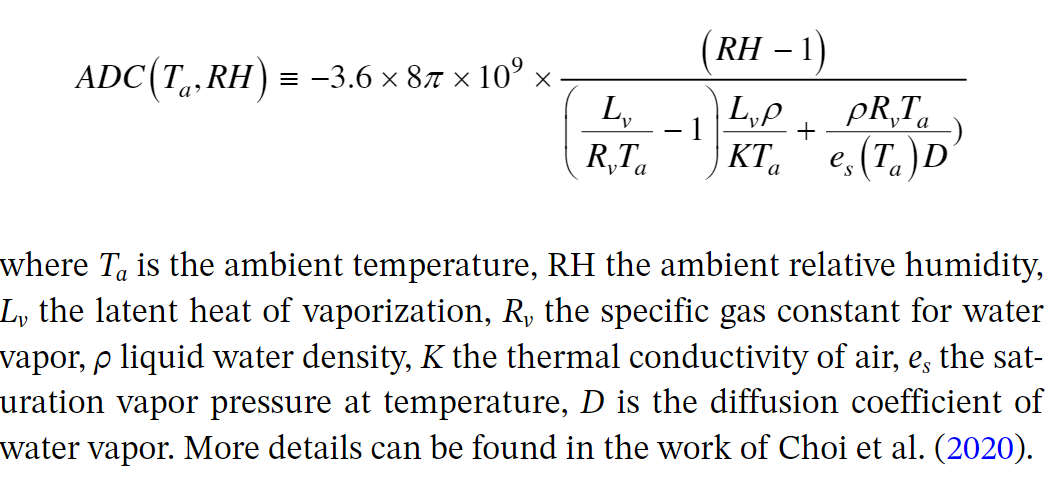

In [ ]:
Image('/content/drive/MyDrive/data/covid/image/formula.PNG')

## 논문 결론 요약

크게 온도 습도 ADC UV(자외선)을 변인으로 코로나 확진자수를 분석함.

1. 온도, 습도는 계절성과 큰 관련이 있음. 이는 분명히 코로나 확진자 수에 영향을 미침. 하지만 계절적 특성이 서로 상이한 국가에서는 공통적으로 같은 규칙성이 나타나진 않음.

2. 반면 ADC(온도와 습도의 조합) 지표는 계절대와 관계없이 일관된 규칙을 보임. 이 지표 또한 계절성을 지님.

3. UV(자외선) 지표도 계절성을 지니고 계절대 관계없이 일관된 규칙을 보임.

* 결론: ADC, UV 지표는 계절대와 관계없이 계절적 특징과 코로나 확진자수와의 관계를 잘 나타낸다.

* ADC: 온도에 비선형적으로 비례 / 습도에 반비례 => 확진자수에 반대되는 경향

* ADC down 확진자수 up / ADC up 확진자수 down

## 논문 ADC - Confirmed fig

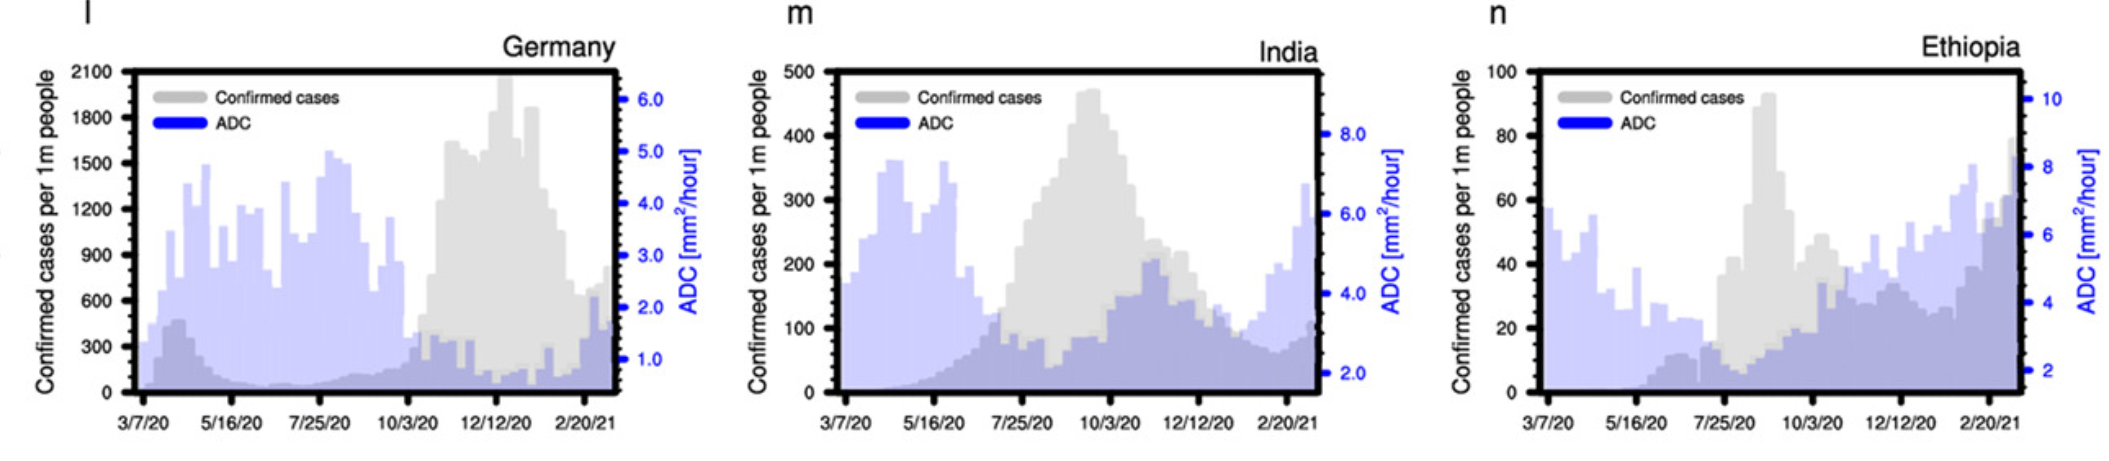

In [ ]:
Image('/content/drive/MyDrive/data/covid/image/ADC.PNG')

## 논문을 통한 설계

1. 서울시 월별 습도와 온도 자료를 수집

2. 이를 ADC의 계량된 공식에 대입함.

3. 대입하여 나온 ADC 수치 그리고 확진자수 수치를 정규화 하여 그래프를 출력

## 그래프 예상

1. ADC and 확진자수: 서로 반대되는 경향으로 그려질 것으로 예상
2. (1/ADC) and 확진자수: 서로 같은 경향으로 그려질 것으로 예상
* 2번은 이해하기 쉽도록 그린 것

## 데이터 로드 및 가공

In [ ]:
temp = '/content/drive/MyDrive/data/covid/기온.csv'
humi = '/content/drive/MyDrive/data/covid/습도.csv'
temp = pd.read_csv(temp, encoding='cp949')
humi = pd.read_csv(humi, encoding='cp949')

In [ ]:
temp.head()

,\t\t지점번호,지점명,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),\t최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
0,\t\t108,서울,Jan-20,1.6,5.9,11.9,2020-01-26,-1.7,-6.5,2020-01-01
1,\t\t108,서울,Feb-20,2.5,7.2,15.6,2020-02-15,-1.3,-11.8,2020-02-06
2,\t\t108,서울,Mar-20,7.7,13.3,20.6,2020-03-26,2.6,-2.8,2020-03-05
3,\t\t108,서울,Apr-20,11.1,16.6,23.8,2020-04-16,6.3,1.9,2020-04-05
4,\t\t108,서울,May-20,18.0,23.3,30.0,2020-05-30,13.7,9.2,2020-05-20


In [ ]:
humi.head()

,\t\t지점번호,지점명,일시,평균습도(%rh),최저습도(%rh)
0,\t\t108,서울,Jan-20,56.0,17.0
1,\t\t108,서울,Feb-20,58.0,14.0
2,\t\t108,서울,Mar-20,46.0,11.0
3,\t\t108,서울,Apr-20,50.0,10.0
4,\t\t108,서울,May-20,67.0,11.0


In [ ]:
temp_l = temp['평균기온(℃)'].tolist()
humi_l = humi['평균습도(%rh)'].tolist()

In [ ]:
def cal(t, rh):
  return t/rh

total = []
for i in range(10):
  out = cal(temp_l[i],humi_l[i])
  total.append(out)

In [ ]:
total

[0.028571428571428574,
 0.04310344827586207,
 0.1673913043478261,
 0.222,
 0.26865671641791045,
 0.3514705882352941,
 0.312987012987013,
 0.31176470588235294,
 0.30140845070422534,
 0.23442622950819672]

In [ ]:
mt = confirmed['month']
mt = pd.DataFrame(mt.value_counts())
new_index = map(int,mt.index.tolist())
mt.index = new_index
mt = mt.sort_index()
num = mt['month'].tolist()
num

[7, 80, 391, 156, 228, 460, 281, 2416, 1304, 425]

## month - ADS and 확진자수 그래프

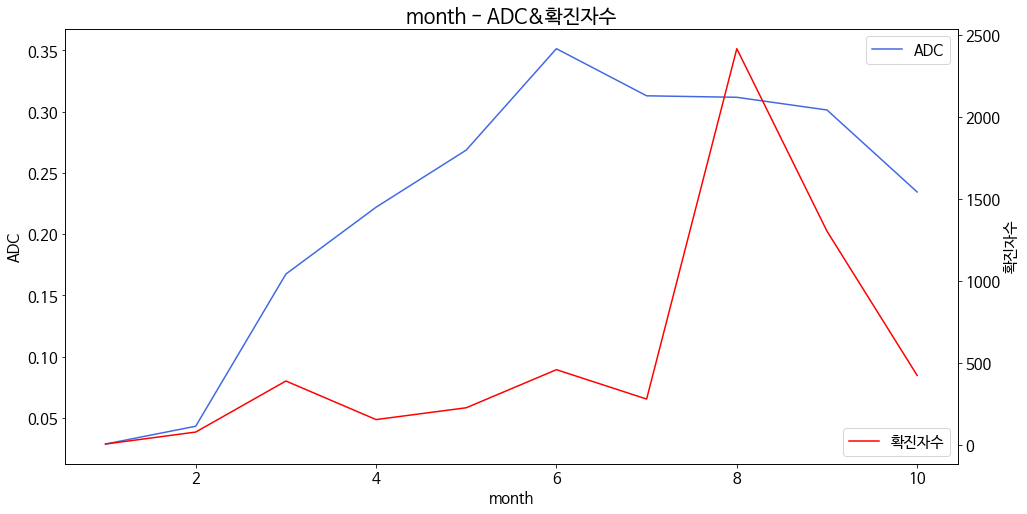

In [ ]:
x_list = np.array([1,2,3,4,5,6,7,8,9,10])

y_list1 = np.array(total)



y_list2 = np.array(num)


fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot() 
plt.rc('font', size=15) 

ax1.plot(x_list, y_list1, color='royalblue', label = 'ADC')
ax1.set_ylabel('ADC')
ax1.set_xlabel('month')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(x_list, y_list2, color='red', label = '확진자수')
ax2.set_ylabel('확진자수')
ax2.legend(loc = 'lower right')



plt.title('month - ADC&확진자수', fontsize = 20)
plt.show()

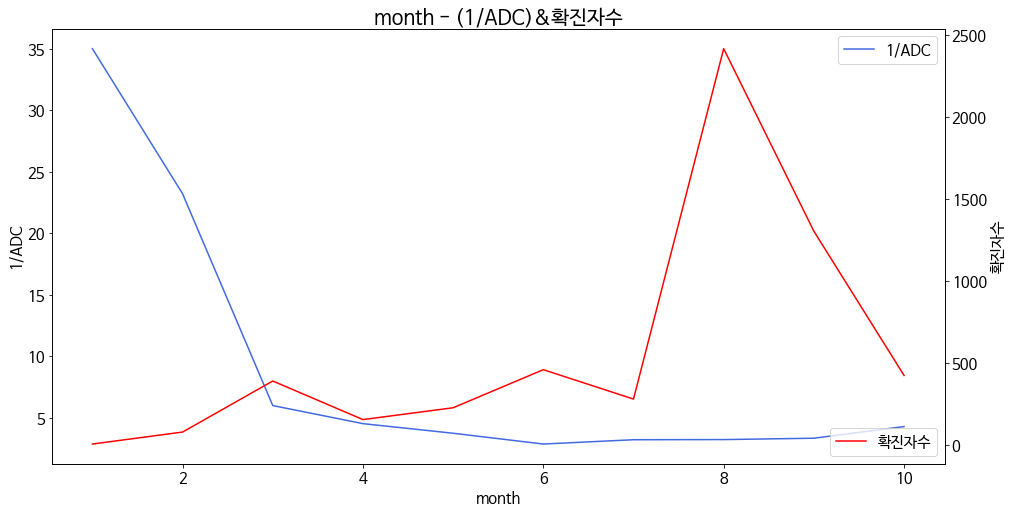

In [ ]:
x_list = np.array([1,2,3,4,5,6,7,8,9,10])

y_list1 = np.array(total)
y_list1 = 1/y_list1

y_list2 = np.array(num)

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot() 
plt.rc('font', size=15) 

ax1.plot(x_list, y_list1, color='royalblue', label = '1/ADC')
ax1.set_ylabel('1/ADC')
ax1.set_xlabel('month')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(x_list, y_list2, color='red', label = '확진자수')
ax2.set_ylabel('확진자수')
ax2.legend(loc = 'lower right')


ax1.fig = (24,10)

plt.title('month - (1/ADC)&확진자수', fontsize = 20)
plt.show()

## 분석

1. 두 그래프 모두 논문 예상과 반대되는 경향을 보이고 있다.

2. 이러한 현상의 원인에는 계절에 의한 특성이 강력한 변인이 아닐 가능성이 크기 때문이다.

3. 정책에 따른 유동인구수가 보다 더 강력한 원인 제공자가 될 것이라고 예상한다.

## 추가: 온도와 습도에 대한 분석

1. 일반적으로 전염병 유행과 온도는 반대의 경향을 보임(예: 독감의 겨울 유행)
2. 습도 또한 일반적으로 확진자수와 반대의 경향을 보임(예: 습도 높으면 바이러스 생존 위협)

### 온도와 확진자수

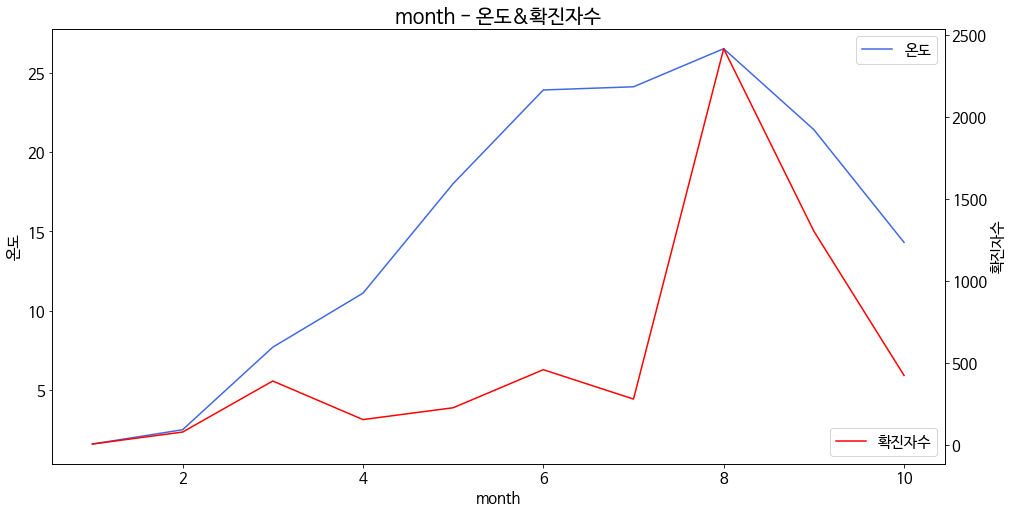

In [ ]:
x_list = np.array([1,2,3,4,5,6,7,8,9,10])

y_list1 = np.array(temp_l[:10])

y_list2 = np.array(num)


fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot() 
plt.rc('font', size=15) 

ax1.plot(x_list, y_list1, color='royalblue', label = '온도')
ax1.set_ylabel('온도')

ax1.set_xlabel('month')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(x_list, y_list2, color='red', label = '확진자수')
ax2.set_ylabel('확진자수')
ax2.legend(loc = 'lower right')


ax1.fig = (24,10)

plt.title('month - 온도&확진자수', fontsize = 20)
plt.show()

### 습도와 확진자수

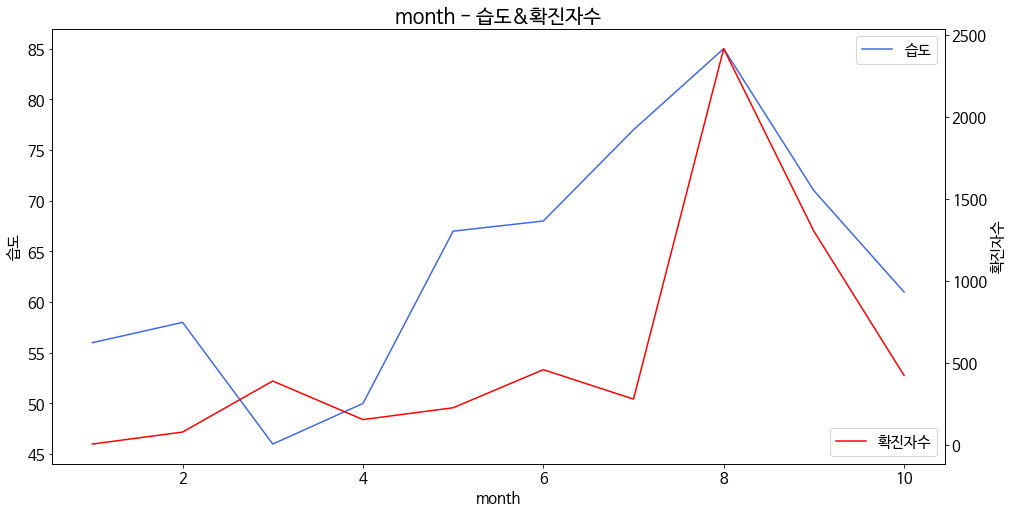

In [ ]:
x_list = np.array([1,2,3,4,5,6,7,8,9,10])

y_list1 = np.array(humi_l[:10])

y_list2 = np.array(num)


fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot() 
plt.rc('font', size=15) 

ax1.plot(x_list, y_list1, color='royalblue', label = '습도')
ax1.set_ylabel('습도')

ax1.set_xlabel('month')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(x_list, y_list2, color='red', label = '확진자수')
ax2.set_ylabel('확진자수')
ax2.legend(loc = 'lower right')


ax1.fig = (24,10)

plt.title('month - 습도&확진자수', fontsize = 20)
plt.show()

### 분석

일반적인 상식과 다른 경향을 보임. 결국 seosonality는 중요한 변인이 아님을 확인

# 유동인구수 분석

가설: 이전달들의 유동인구수가 많으면 확진자수가 증가할 것(선행지표)

## load data

In [ ]:
people = pd.read_csv('/content/drive/MyDrive/data/covid/자치구단위 서울생활인구 일별 집계표.csv',encoding='cp949')

In [ ]:
people.head()

,기준일ID,시군구코드,시군구명,총생활인구수,내국인생활인구수,장기체류외국인인구수,단기체류외국인인구수,일최대인구수,일최소인구수,주간인구수(09~18),야간인구수(19~08),일최대이동인구수,서울외유입인구수,동일자치구행정동간이동인구수,자치구간이동인구수
0,20220209,11000,서울시,1.097201e+07,1.049154e+07,379138.6370,101330.9647,1.132635e+07,1.064862e+07,1.126747e+07,1.076097e+07,6.169822e+06,1.485902e+06,2.145878e+06,2.538042e+06
1,20220209,11110,종로구,2.990435e+05,2.791209e+05,14794.0188,5128.5136,4.032005e+05,2.205639e+05,3.764757e+05,2.437348e+05,2.690158e+05,6.875486e+04,3.252422e+04,1.677368e+05
2,20220209,11140,중구,3.019322e+05,2.709014e+05,18757.2488,12273.5743,4.443672e+05,1.955440e+05,4.089925e+05,2.254606e+05,3.221131e+05,8.522943e+04,3.222014e+04,2.046635e+05
3,20220209,11170,용산구,3.027631e+05,2.823756e+05,17800.0074,2587.4402,3.278476e+05,2.772153e+05,3.243271e+05,2.873602e+05,1.874669e+05,4.899267e+04,4.788219e+04,9.059207e+04
4,20220209,11200,성동구,3.678144e+05,3.507158e+05,15375.7839,1722.7683,3.918767e+05,3.407799e+05,3.880885e+05,3.533329e+05,2.238608e+05,4.437396e+04,6.253446e+04,1.169524e+05


## 데이터 가공

In [ ]:
people = people[people['기준일ID'] <= 20210000]
people['month'] = people.apply(lambda row : int(str(row['기준일ID'])[-4:-2]), axis = 1)
seoul = people[people['시군구명']=='서울시']

In [ ]:
total = []

for i in range(1,11):
  mon = people[people['month']==i]
  pp = mon['총생활인구수']
  total.append(pp.sum()*30/pp.count())

In [ ]:
total

[26124903.398076918,
 26392013.21561936,
 25854045.17290198,
 25720337.03691923,
 25499372.744166255,
 25587741.31754615,
 25571521.7775335,
 25145223.43457196,
 25229820.674192306,
 25037800.514944177]

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



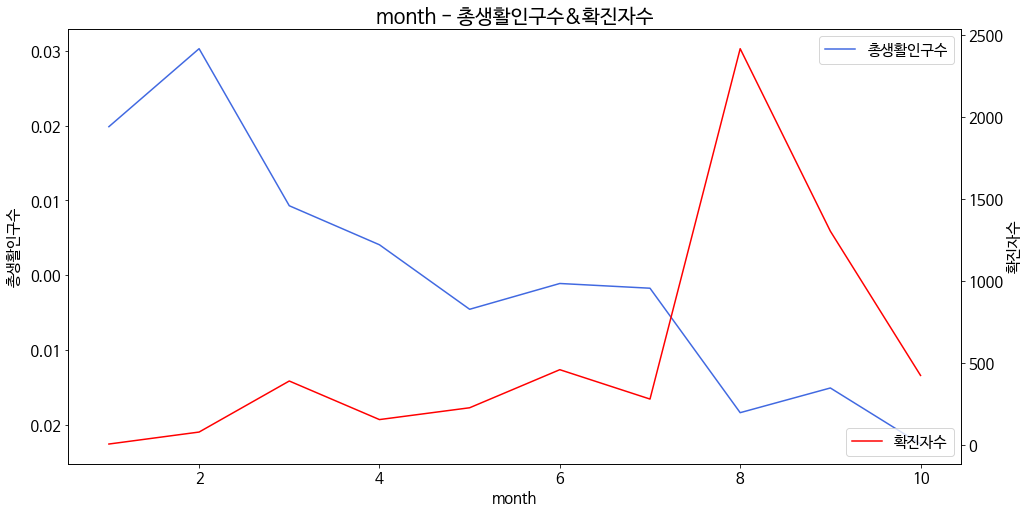

In [ ]:
x_list = np.array([1,2,3,4,5,6,7,8,9,10])

y_list1 = np.array(total)
y_list1 = (y_list1- y_list1.mean())/y_list1.mean()

y_list2 = np.array(num)


fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot() 
plt.rc('font', size=15) 

ax1.plot(x_list, y_list1, color='royalblue', label = '총생활인구수')
ax1.set_ylabel('총생활인구수')

ax1.set_xlabel('month')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(x_list, y_list2, color='red', label = '확진자수')
ax2.set_ylabel('확진자수')
ax2.legend(loc = 'lower right')


ax1.fig = (24,10)

plt.title('month - 총생활인구수&확진자수', fontsize = 20)
plt.show()

데이터 부족으로 선행관계 파악 불가

## 추가 데이터 분석

In [ ]:
covid_num = pd.read_csv('/content/drive/MyDrive/data/covid/서울시 코로나19 확진자 발생동향.csv',encoding='cp949')
covid_num2 = pd.read_csv('/content/drive/MyDrive/data/covid/서울시 코로나19 확진자 발생동향 (1).csv',encoding='cp949')
covid_num3 = pd.read_csv('/content/drive/MyDrive/data/covid/서울시 코로나19 확진자 발생동향 (2).csv',encoding='cp949')
covid_num = pd.concat([covid_num,covid_num2,covid_num3])
people = pd.read_csv('/content/drive/MyDrive/data/covid/자치구단위 서울생활인구 일별 집계표 (1).csv',encoding='cp949')

In [ ]:

people['year_month'] = people.apply(lambda row : int(str(row['기준일ID'])[:-2]), axis = 1)
seoul = people[people['시군구명']=='서울시']

In [ ]:
seoul['year_month'].unique()

array([202301, 202212, 202211, 202210, 202209, 202208, 202207, 202206,
       202205, 202204, 202203, 202202, 202201, 202112, 202111, 202110,
       202109, 202108, 202107, 202106, 202105, 202104, 202103, 202102,
       202101, 202012, 202011, 202010, 202009, 202008, 202007, 202006,
       202005, 202004, 202003, 202002, 202001, 201912, 201911, 201910,
       201909, 201908, 201907, 201906, 201905, 201904, 201903, 201902,
       201901, 201812, 201811, 201810, 201809, 201808, 201807, 201806,
       201805, 201804])

In [ ]:
total = []
ll = [202000,202100,202200]
for j in ll:
  if j == 202000:
      for i in range(2,13):
        mon = people[people['year_month']==j+i]
        pp = mon['총생활인구수']
        total.append(pp.sum()*30/pp.count())
  else:
    for i in range(1,13):
        mon = people[people['year_month']==j+i]
        pp = mon['총생활인구수']
        total.append(pp.sum()*30/pp.count())

In [ ]:
print(len(total))

35


In [ ]:
covid_num.head()

,서울시 기준일,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 사망,서울시 의심환자 전체,서울시 의심환자 검사중,서울시 의심환자 검사결과(음성),...,전국 의심환자 전체,전국 의심환자 검사중,전국 의심환자 검사결과(음성),자가격리자 해외입국자 감시중,자가격리자 해외입국자 감시해제,자가격리자 접촉자 감시중,자가격리자 접촉자 감시해제,확인중 확진자,서울시 당일사망자,전국 당일 사망자
0,2020.12.31.00,19004,366,8386,10441.0,316.0,177,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,2020.12.30.00,18638,387,8341,10125.0,115.0,172,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,2020.12.29.00,18253,523,8076,10010.0,399.0,167,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,2020.12.28.00,17731,301,7961,9611.0,22.0,159,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,2020.12.27.00,17430,362,7684,9589.0,109.0,157,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [ ]:
covid_num['year_month'] = covid_num.apply(lambda x: int(x['서울시 기준일'][:4]+x['서울시 기준일'][5:7]), axis = 1)

In [ ]:
covid_num['year_month'].unique()

array([202012, 202011, 202010, 202009, 202008, 202007, 202006, 202005,
       202004, 202003, 202002, 202112, 202111, 202110, 202109, 202108,
       202107, 202106, 202105, 202104, 202103, 202102, 202101, 202212,
       202211, 202210, 202209, 202208, 202207, 202206, 202205, 202204,
       202203, 202202, 202201])

In [ ]:
total2 = []
ll = [202000,202100,202200]
for j in ll:
  if j == 202000:
      for i in range(2,13):
        mon = covid_num[covid_num['year_month']==j+i]
        pp = mon['서울시 추가 확진']
        total2.append(pp.sum())
  else:
    for i in range(1,13):
        mon = covid_num[covid_num['year_month']==j+i]
        pp = mon['서울시 추가 확진']
        total2.append(pp.sum())

In [ ]:
print(len(total2))

35


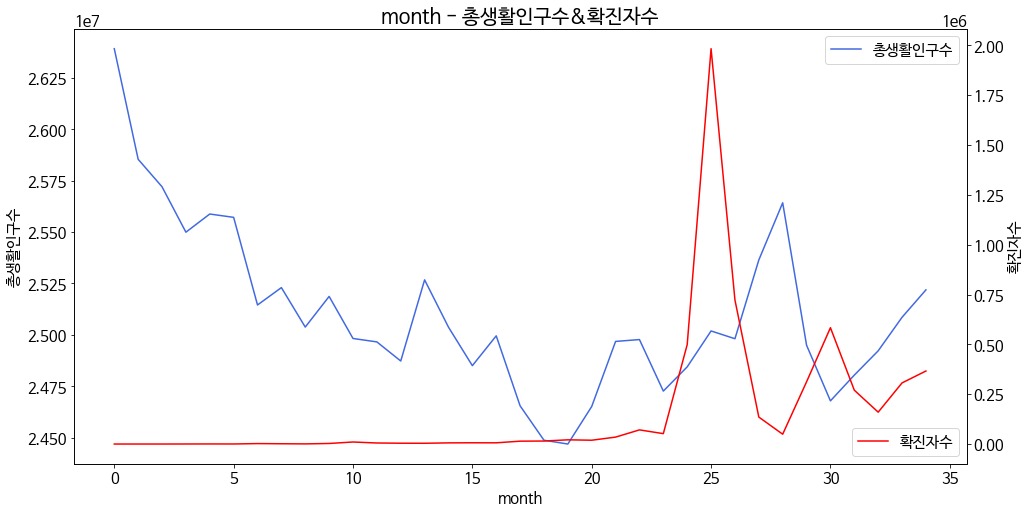

In [ ]:


y_list1 = np.array(total)
# y_list1 = (y_list1- y_list1.mean())/y_list1.mean()

y_list2 = np.array(total2)


fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot() 
plt.rc('font', size=15) 

ax1.plot(y_list1, color='royalblue', label = '총생활인구수')
ax1.set_ylabel('총생활인구수')

ax1.set_xlabel('month')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(y_list2, color='red', label = '확진자수')
ax2.set_ylabel('확진자수')
ax2.legend(loc = 'lower right')


ax1.fig = (24,10)

plt.title('month - 총생활인구수&확진자수', fontsize = 20)
plt.show()


**선행지표 특정해석**
1. 0~20개월 까지의 유동인구수 때문에 25개월 근처 확진자수가 폭발적으로 발생

2. 27개월 부근의 유동인구수 증가가 30개월 부근의 확진자수 증가에 영향

**하지만 이러한 분석은 데이터를 추가해도 적기에 단정하기에는 무리가 있음**

# -------------수행끝-------------------

# 성과 및 기대효과

- 목표는 시계열 데이터의 채널에 들어갈 데이터를 추출하는 것이었고 이는 채널에 들어가면 모델 성능 저하를 시킬 수 있는 지표를 거르는 역할도 있다. 특히 **온도와 습도**는 일반적으로 큰 영향을 미친다고 알려져 있고 논문에서도 이점을 시사하고 있지만 실정에 맞지 않음을 학습전에 분석하고 채널에서 제외하여 데이터의 **노이즈를 줄이는 효과를 볼 수 있다.**   
- 또한 지역별 확진자의 표준편차가 확진자수 추이와 비슷함을 보이는 것은 학습에 있어서 보다 더 좋은 지표가 데이터셋에 추가되는 효과를 기대해 볼 수 있다.  

- 데이터수가 많이 없어서 정확한 분석은 어렵지만 유동인구수 또한 선행지표로서의 역할을 일부 수행하고 있음을 알 수 있었고 이 또한 학습에 큰 도움이 될 것이다.  

- 전체적으로 인공지능 모델 학습 뿐만 아니라 대중에게 코로나에 대한 올바른 인식을 데이터 분석을 통해 정확한 근거로 심어줄 수 있는 것 또한 기대할 수 있다.